# Practicum in human intelligent information processing

**Author:** [Vishal Gaurav](https://www.linkedin.com/in/vishalgauraviitp) 

Kyushu Institute of Technology

## Content
* numpy
* matplotlib
* scipy

In [ ]:
# %doctest_mode 
# %matplotlib inline 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 

**Example 1 : creating numpy array using inbuilt function**

In [ ]:
a=np.arange(15).reshape(3,5)

In [ ]:
a

In [ ]:
a.shape

In [ ]:
a.ndim

In [ ]:
a.dtype.name

In [ ]:
a.size

In [ ]:
a.itemsize

In [ ]:
type(a)

**numpy array declaration and common errors**

In [ ]:
#a = np.array(1,2,3,4)    # WRONG
a = np.array([1,2,3,4])  # RIGHT
b = np.array([(1.5,2,3), (4,5,6)])


**Type of array can also be explicity specified at time of creation**

In [ ]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )


**Some useful array**

In [ ]:
q=np.zeros((3,4))
w=np.ones((2,3,4),dtype=np.int16) #dtype can also be specified
x=np.empty((2,3)) #uninitialized, output may vary

In [ ]:
x

### To create _sequence_ of numbers, **Numpy** provides a function analogous to _range_ that retuns _array_ insted of list

In [ ]:
np.arange(10,30,5)

In [ ]:
np.arange(0,2,0.3) # it can accept float arguments

### When **arange** is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the **finite floating point precision**. For this reason, it is usually better to use the function **linspace** that receives as an **_argument_** the number of elements that we want, instead of the step:

In [ ]:
np.linspace(0,2,9) # 9 numbers from 0 to 2

In [ ]:
from numpy import pi

In [ ]:
x = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
f = np.sin(x)


### **Printing arrays**

In [ ]:
a = np.arange(6)                         # 1d array
print(a)

In [ ]:
b = np.arange(12).reshape(4,3)           # 2d array
print(b)

In [ ]:
c = np.arange(24).reshape(2,3,4)         # 3d array
print(c)

### **If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:**

In [ ]:
print(np.arange(10000))

In [ ]:
print(np.arange(10000).reshape(100,100))

### **To disable this behaviour and force NumPy to print the entire array, you can change the printing options using set_printoptions.**

In [ ]:
#np.set_printoptions(threshold='nan')

#### **Basic operations**

In [ ]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

In [ ]:
c = a-b
c

In [ ]:
b**2

In [ ]:
10*np.sin(a)

In [ ]:
a<35

#### **Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function or method:**

In [ ]:
A = np.array( [[1,1],
            [0,1]] )
B = np.array( [[2,0],
            [3,4]] )
A*B                         # elementwise product

In [ ]:
A.dot(B)                    # matrix product

In [ ]:
np.dot(A, B)                # another matrix product

#### Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [ ]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

In [ ]:
b += a
b

In [ ]:
#a += b                  # b is not automatically converted to integer type

**When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).**

# An introduction to machine learning with scikit-learn

### in this section, we will introduce the machine learning vocabbulary that we will use throughout 
### scikit-learn and give a simple learning example.

# **Machine learning: the problem setting**

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), is it said to have several attributes or features.

We can separate learning problems in a few large categories:



* **_supervised learning_** , in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:


    * classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
    * regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.


* **_unsupervised learning_**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization

### Loading an example dataset

scikit-learn comes with a few standard datasets, for instance the **iris** and **digits** datasets for **classification** and the **boston house prices dataset** for **regression**.

In [2]:
from sklearn import datasets
iris= datasets.load_iris()
digits= datasets.load_digits()

A dataset is a **dictionary**-like object that holds all the data and some metadata about the data. This data is stored in the **.data** member, which is a **n_samples, n_features** array. In the case of supervised problem, one or more response variables are stored in the **.target** member.

In [3]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [4]:
print(digits.target)

[0 1 2 ..., 8 9 8]


### Shape of the data arrays
The data is always a 2D array, **shape (n_samples, n_features)**, although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

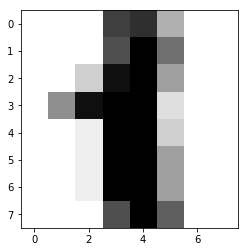

In [7]:
digits.images[0].shape
plt.imshow(digits.images[1],cmap=plt.cm.binary, interpolation='nearest')

## Learning and predecting
In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.
In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

An example of an estimator is the class sklearn.svm.SVC that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001,C=100)

In [9]:
clf.fit(digits.data[:-1],digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
print (clf.predict(digits.data[-1:]))

[8]


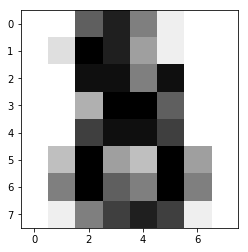

In [11]:
img = digits.images[-1]
plt.imshow(img, cmap=plt.cm.binary, interpolation='nearest')


## Model Persistence
It is possible to save a model in the scikit by using Python’s built-in persistence model, namely **pickle**:

In [12]:
import pickle

In [13]:
s = pickle.dumps(clf)

In [14]:
clf2 = pickle.loads(s)

In [15]:
clf2.predict(digits.data[0:1])

array([0])

In [16]:
from sklearn.externals import joblib

In [17]:
joblib.dump(clf, 'filename.pkl') 

['filename.pkl']

In [18]:
clf = joblib.load('filename.pkl') 

# **Some Machine leaning Example Using Python**

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

In [19]:
images_and_labels = list(zip(digits.images, digits.target))

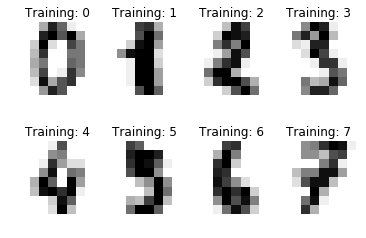

In [20]:
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:


In [21]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier

In [22]:
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits

In [23]:
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Now predict the value of the digit on the second half:

In [24]:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

In [25]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [26]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [27]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [28]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))

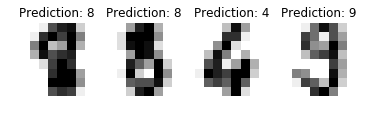

In [33]:
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

# Try for Iris dataset

In [ ]:
iris = datasets.load_iris()

